# Assignment 2
# Nikunj Bhatia

# Q1 K-Means

In [104]:
import pandas as pd
import numpy as np
import random as rd

In [105]:
df=pd.read_csv('data.csv')

In [106]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [107]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [109]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [110]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [111]:
import matplotlib.pyplot as plt
import math as m

In [112]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLNE = '\033[4m'
    END = '\033[0m'

In [113]:
def plot_data(X):
    plt.figure(figsize=(7.5,6))
    for i in range(len(X)):
        plt.scatter(X[i][0],X[i][1],color='k')

In [114]:
def random_centroid(X,k):
    #Creating k random indices and using the data point at that indices as centroid 
    random_idx=[np.random.randint(len(X)) for i in range(k)]
    centroids=[]
    for i in random_idx:
        centroids.append(X[i])
    return centroids

In [115]:
def assign_cluster(X,ini_centroids,k):
    cluster=[] 
    for i in range(len(X)):
        euc_dist=[] 
        for j in range(k):
            euc_dist.append(np.linalg.norm(np.subtract(X[i],ini_centroids[j]))) 
        idx=np.argmin(euc_dist) 
        cluster.append(idx) 
    return np.asarray(cluster)

In [116]:
def compute_centroid(X,clusters,k):
    centroid = [] #stores the centroid values
    for i in range(k):
        temp_arr=[]
        for j in range(len(X)):
            
            if clusters[j]==i:
                temp_arr.append(X[j])
        
        centroid.append(np.mean(temp_arr,axis=0))
    return np.asarray(centroid)

In [117]:

def difference(prev,nxt):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-nxt[i])
    return diff

In [118]:
def show_clusters(X,clusters,centroids,ini_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    cols={0:'r',1:'b',2:'g',3:'coral',4:'c',5:'lime'}
    fig,ax=plt.subplots(figsize=(7.5,6));
    for i in range(len(clusters)):
        ax.scatter(X[i][0],X[i][1],color=cols[clusters[i]])
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="+",s=150,color=cols[j])
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[i][0],centroids[i][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((ini_centroids[i][0],ini_centroids[i][1]),0.4,linewidth=2,color='y',fill=False))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Clustering")
    if show_plots==True:
        plt.show()

In [119]:

def k_means(X,k,show_type='all',show_plots=True):
    c_prev=random_centroid(X,k)
    cluster=assign_cluster(X,c_prev,k)
    diff = 100 
    ini_centroid = c_prev; 
    
    print(color.BOLD+"NOTE:\n + and Yellow Circle -> Initial Centroid\n * andBlack Circle -> Final Centroid"+color.END)
    
    
    if show_plots:
        print(color.BOLD+"\n\nInitial Plot:\n"+color.END)
        show_clusters(X,cluster,c_prev,ini_centroid,show_plots=show_plots)
    while diff>0.0001:
        cluster = assign_cluster(X,c_prev,k) 
        
        if show_type=='all' and show_plots:
            show_clusters(X,cluster,c_prev,ini_centroid,False,False,show_plots=show_plots)
            mark_centroid=False 
            show_ini_centroid=False 
        c_new = compute_centroid(X,cluster,k) 
        diff = difference(c_prev,c_new) 
        c_prev=c_new 
    
    if show_plots:
        print(color.BOLD+"\nInitial Cluster Centers:\n"+color.END)
        print(ini_centroid)
        print(color.BOLD+"\nFinal Cluster Centers:\n"+color.END)
        print(c_prev)
        print(color.BOLD+"\n\nFinal Plot:\n"+color.END) 
        show_clusters(X,cluster,c_prev,ini_centroid,mark_centroid=True,show_ini_centroid=True)    
    return cluster,c_prev

In [120]:
def validate(original_clus,my_clus,k):
    ori_grp=[]
    my_grp=[]
    for i in range(k):
        temp=[]
        temp1=[]
        for j in range(len(my_clus)):
            if my_clus[j]==i:
                temp.append(j)
            if original_clus[j]==i:
                temp1.append(j)
        my_grp.append(temp)
        ori_grp.append(temp1)
    same_bool=True
    for f in range(len(ori_grp)):
        if my_grp[f] not in ori_grp:
            print(color.BOLD+"Not Same"+color.END)
            same_bool=False
            break;
    if same_bool:
        print(color.BOLD+"Both the clusters are equal"+color.END)

In [121]:
k=2

In [122]:
X=df.drop('diagnosis',axis=1).values

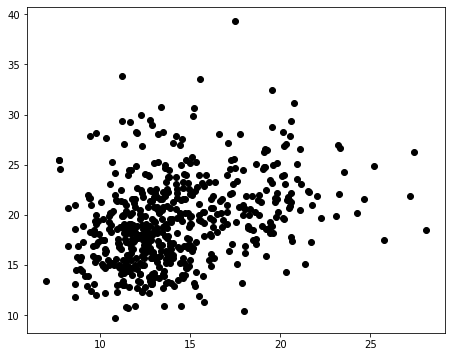

In [123]:
plot_data(X)

NOTE:
 + and Yellow Circle -> Initial Centroid
 * andBlack Circle -> Final Centroid


Initial Plot:



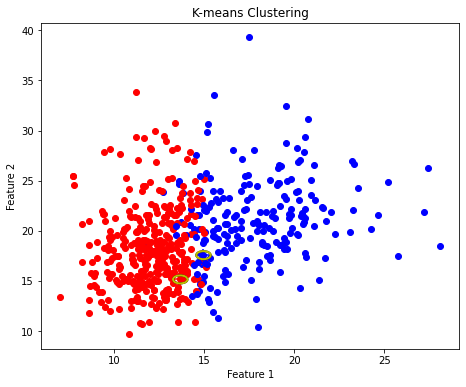


Initial Cluster Centers:

[array([1.366e+01, 1.515e+01, 8.827e+01, 5.806e+02, 8.268e-02, 7.548e-02,
       4.249e-02, 2.471e-02, 1.792e-01, 5.897e-02, 1.402e-01, 5.417e-01,
       1.101e+00, 1.135e+01, 5.212e-03, 2.984e-02, 2.443e-02, 8.356e-03,
       1.818e-02, 4.868e-03, 1.454e+01, 1.964e+01, 9.796e+01, 6.570e+02,
       1.275e-01, 3.104e-01, 2.569e-01, 1.054e-01, 3.387e-01, 9.638e-02]), array([1.495e+01, 1.757e+01, 9.685e+01, 6.781e+02, 1.167e-01, 1.305e-01,
       1.539e-01, 8.624e-02, 1.957e-01, 6.216e-02, 1.296e+00, 1.452e+00,
       8.419e+00, 1.019e+02, 1.000e-02, 3.480e-02, 6.577e-02, 2.801e-02,
       5.168e-02, 2.887e-03, 1.855e+01, 2.143e+01, 1.214e+02, 9.714e+02,
       1.411e-01, 2.164e-01, 3.355e-01, 1.667e-01, 3.414e-01, 7.147e-02])]

Final Cluster Centers:

[[1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922

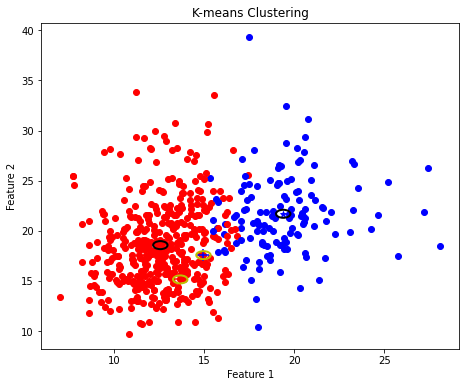

In [124]:

cluster,centroid = k_means(X,k,show_type='ini_fin')

In [125]:
from sklearn.cluster import KMeans

In [126]:
y=df['diagnosis'].values

In [127]:
y_num = []
for item in y:
    if item=='M':
        y_num.append(0)
    else:
        y_num.append(1)

In [128]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [129]:
from sklearn import metrics

In [130]:
print("accuracy:",metrics.accuracy_score(y_num, y_km))

accuracy: 0.8541300527240774


# We get accuracy of 85.4% of our K-Means model.

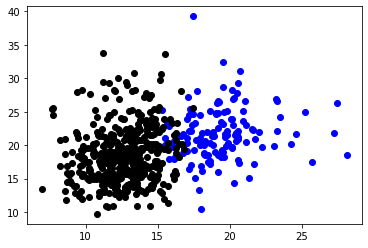

In [131]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],c='blue')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],c='black')
plt.show()

In [132]:
#Supervised Learning
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [133]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [134]:
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

cl = DecisionTreeClassifier()
cl = cl.fit(x_train, y_train)
y_pred = cl.predict(x_test)



In [135]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9385964912280702


# We get a little better result with supervised learning.

In [136]:
# References https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c

# Q2 Gradient Descent 

# Function 1


In [137]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

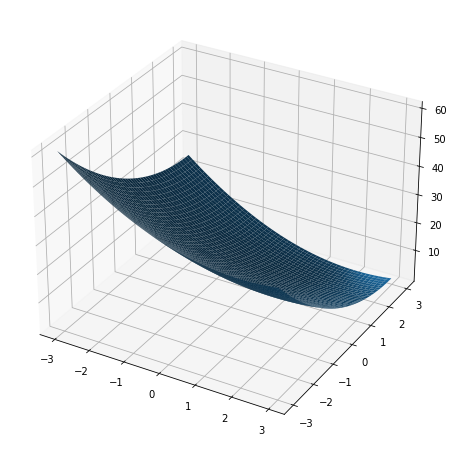

In [138]:
def func(x,y) :
    return (x-2)**2 + (y-3)**2

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.015)
X, Y = np.meshgrid(x, y)
zs = np.array([func(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)

In [139]:
def derivative_one_x(x,y) :
    return 2*(x-2)

def derivative_two_x(x,y) :
    return 2

def derivative_one_y(x,y) :
    return 2*(y-3)

def derivative_two_y(x,y) :
    return 2


def gradient_descent(alpha=0.5) :
    x = 0
    y = 0
    for i in range(10) :
        x -= derivative_one_x(x,y)
        y -= derivative_one_y(x,y)
        function_value = func(x,y)
        print(x,y,function_value)

def newton_method() :
    x = 0
    y = 0
    
    for i in range(10) :
        x -= derivative_one_x(x,y)/derivative_two_x(x,y)
        y -= derivative_one_y(x,y)/derivative_two_y(x,y)
        function_value = func(x,y)
        print(x,y,function_value)

In [140]:
gradient_descent(alpha=0.5)

4 6 13
0 0 13
4 6 13
0 0 13
4 6 13
0 0 13
4 6 13
0 0 13
4 6 13
0 0 13


In [141]:
newton_method()

2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0
2.0 3.0 0.0


#### Clearly, Newton Method converges to a lower value and that too at a much faster rate

# Function 2

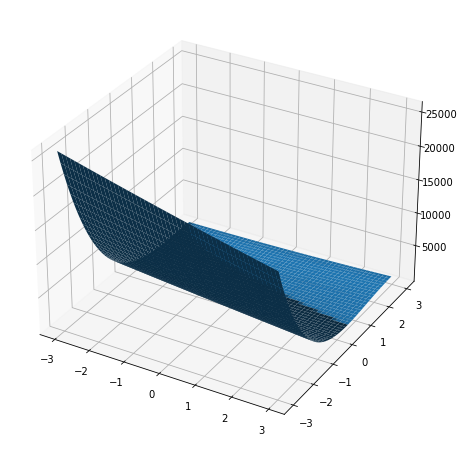

In [142]:
def func2(x,y) :
    return (4-y)**2 + 20*((x+3) - (y-3)**2)**2

# plot the function to visualise

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.015)
X, Y = np.meshgrid(x, y)
zs = np.array([func2(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)


In [143]:
def dx(x,y) :
    return 40*(x + 3 - (y-3)**2)

def d2x(x,y) :
    return 40

def dy(x,y) :
    return -2*(4-y) - 80*(x+3-(y-3)**2)*(y-3)

def d2y(x,y) :
    return 160*(y-3)**2 - 80*(x+3-(y-3)**2) + 2

def GD(alpha=0.003) :
    x = 0
    y = 0
    
    for i in range(100) :
        x -= alpha*dx(x,y)
        y -= alpha*dy(x,y)
        fv = func2(x,y)
        print(x,y,fv)
    
def NGD() :
    x = 0
    y = 0
    
    for i in range(100) :
        x -= dx(x,y)/d2x(x,y)
        y -= dy(x,y)/d2y(x,y)
        fv = func2(x,y)
        print(x,y,fv)

In [144]:
GD(alpha=0.05)

12.0 -71.60000000000001 616091235.8720005
11112.320000000005 -1656231.7840000014 1.5049344978449363e+26
5486227308344.743 -1.8172960965214798e+19 2.1813872511606115e+78
6.605130204864416e+38 -2.400695467663245e+58 6.643214659790729e+234


OverflowError: (34, 'Result too large')

In [145]:
NGD()

6.0 0.005547850208044383 15.97776763684351
5.966743677393664 0.011108524766649572 15.933394957843863
5.933472250722595 0.01668211051484921 15.888981391445002
5.9001856297221345 0.022268695264626444 15.844526672230586
5.866883723201031 0.027868367816143054 15.800030531889085
5.8335664390278765 0.03348121797327511 15.755492699169313
5.800233684117323 0.03910733655946271 15.710912899835108
5.766885364416 0.044746815433881634 15.666290856619073
5.733521384888183 0.050399747507944764 15.621626289175412
5.7001416495011945 0.0560662267621417 15.57691891403185
5.6667460612104925 0.06174634826322488 15.532168444540511
5.633334521944494 0.06744020818175106 15.487374590827857
5.599906932589093 0.07314790380998705 15.442537059743586
5.566463192971874 0.07886953358018906 15.397655554808486
5.533003201846023 0.0846051970832651 15.352729776161219
5.499526856873908 0.09035499508783032 15.30775942050401
5.46603405461034 0.09611902955966546 15.262744181047191
5.432524690485497 0.1018974036815887 15.2176

#### Normal gradient descent has an overflow error, whereas Newton's method again performs better and minimises the function

# Q3 Naive Bayes Classifier

In [146]:
boys_df=pd.read_csv('girl_names-2.csv')
girls_df=pd.read_csv('boy_names.csv')
test_df=pd.read_csv('test_names.csv')

In [147]:
boys_df.head()

,Unnamed: 0,x
0,1,Elaina
1,2,Deedee
2,3,Aaliyah
3,4,Kathey
4,5,Antonetta


In [148]:
girls_df.head()

,Unnamed: 0,x
0,1,Otho
1,2,Caswell
2,3,Deforest
3,4,Eddy
4,5,Corbett


In [149]:
def word_length(a):
    return len(a['x'])

In [150]:
def vowel_count(a):
    c = len([i for i in a['x'] if i in 'aeiouAEIOU'])
    return c

In [151]:
boys_df['Word length'] = boys_df.apply( lambda x: word_length(x),axis=1)
girls_df['Word length'] = girls_df.apply( lambda x: word_length(x),axis=1)

In [152]:
boys_df['Vowel count'] = boys_df.apply( lambda x: vowel_count(x),axis=1)
girls_df['Vowel count'] = girls_df.apply( lambda x: vowel_count(x),axis=1)

In [153]:
boys_df = boys_df.assign(Gender='+1')
girls_df = girls_df.assign(Gender='-1')

In [154]:
df= pd.concat([boys_df,girls_df])

In [155]:
df.head()

,Unnamed: 0,x,Word length,Vowel count,Gender
0,1,Elaina,6,4,+1
1,2,Deedee,6,4,+1
2,3,Aaliyah,7,4,+1
3,4,Kathey,6,2,+1
4,5,Antonetta,9,4,+1


In [156]:
test_df['Word length'] = test_df.apply( lambda row: word_length(row),axis=1)
test_df['Vowel Count'] = test_df.apply( lambda row: vowel_count(row),axis=1)

In [157]:
train = test_df.iloc[:,[2,3]]

In [158]:
X,y = df.iloc[:,[2,3]],df.iloc[:,[4]]

In [159]:
from sklearn.naive_bayes import MultinomialNB

In [160]:
NB = MultinomialNB()
y_pred = NB.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [161]:
Predictions = y_pred.predict(train)

In [162]:
final=test_df.assign(Predictions=Predictions)

,Unnamed: 0,x,Word length,Vowel Count,Predictions
0,1,Brittani,8,3,-1
1,2,Brandin,7,2,-1
2,3,Darry,5,1,-1
3,4,Tresa,5,2,-1
4,5,Fabiola,7,4,+1
...,...,...,...,...,...
95,96,Migdalia,8,4,+1
96,97,Abril,5,2,-1
97,98,Aliyah,6,3,+1
98,99,Tianna,6,3,+1


In [164]:
final=test_df.assign(Predictions=Predictions)

In [166]:
final.to_csv('result.csv')

# Q4 Naive Bayes

# a)
$ P(X=x|Y=y) =∏αP(x_α|y) $ is the given equation.


$ P(X=x|Y=y) <∏αP(x_α|y) $  underfits the model.

$ P(X=x|Y=y) >∏αP(x_α|y) $ overfits the model.

One such example of that could be suppose we reconsider the situation in which we need to predict whether a student will go out to play or not given few parameters. Suppose we have parameters like temperature, rainy, cloudy, assignments_pending, etc. Now if we consider all the parameters we can see that rainy and cloudy are quite dependent upon each other hence this will create an overfitting in the model whereas if we only consider rainy and assignment_pending, that is not considering temperature then it will be a case of underfit as we will be considering that the temperature is bit dependent on rainy which is not quite true every time.

# b)
We can represent P(x|y=c) 


$ p(x_{1:D}|y = c) = p(x1|y = c)p(x2|x1, y = c)...p(x_D|x1:D−1, y = c) $

A good representation for the class conditional is a set of C tables which are indexed by the binary feature vector x and hold the values for p(x|y = c). Thus, to get a value like = $p(x|c = 2)$, we would go to table 2, convert the binary feture vector to an array index and lookup the result. The conversion between the array and the binary vector is given by $array_{idx}(x) = \sum x_i 2^i.$

Number of features is equal to: $(2^D − 1)C = O(C2^D)$


# c) 
For N very small, the naive Bayes model would outperform the full model and give low test errors. This would happen because the full model has too many parameters and would overfit on a small dataset.




In [163]:
# Collaborated with Amatya SonBhadra,Manu Singhal